# Prosper Loan Slide
## by (Nasser Al-Nasser )

## Investigation Overview

> The higher the income the higher the spending, also the income and spending through out the states is random, so there is no clue that states that the richest people or the hiest spending is in CA.
> Adminstrative Assitant has the highest income but don't spend alot. Among the Occupations Exuctives are the most spenders, and among the income the (100,000+) spends the most.
> The state that has very rich people is FL & IL, the highest income is for selfEmployed and the other listed jobs.
## Dataset Overview

> The data is for a loan and I will do some cleaning to answer my question and my quastion is insights about the stasifaction and coustmers journy.
>I will replaced the none values in the 'ClosedDate'with 'Un closed' because they are still current customers in the 'LoanStatus'.
> I removed the data that are based on income and loss, because it ha alot of missed data cells and don't help me in my analysis.
> I removed the 'ListingKey' it is additional info for my analysis, also the 'Term' will be removed 
> I removed the 'LoanStatus' also because the 'ClosedDate' also provide the same info with additional info of the closed date
> I changed the None Rows in Ratings to closed.
> I removed 'OnTimeProsperPayments', 'ProsperPrincipalBorrowed','ProsperPaymentsOneMonthPlusLate', and 'ProsperPrincipalOutstanding', since they have alot of missing data and they are not making any problems through my analysis.
> I also removed 'Recommendations' since it has no need

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
Loan = pd.read_csv('Loan')

In [3]:
Loan_clean = pd.read_csv('Loan_clean')

In [4]:
sub_Loan = pd.read_csv('sub_Loan')

In [5]:
sub_Loan1 = pd.read_csv('sub_Loan1')

In [6]:
sub_Loan2 = pd.read_csv('sub_Loan2')

In [7]:
sub_Loan3 = pd.read_csv('sub_Loan3')

In [8]:
msk = Loan_clean.dtypes == np.float64

In [9]:
np.round(Loan_clean.loc[:, msk], 2)

DebtToIncomeRatio  StatedMonthlyIncome  MonthlyLoanPayment  \
0                   0.17              3083.33              330.43   
1                   0.18              6125.00              318.93   
2                   0.06              2083.33              123.32   
3                   0.15              2875.00              321.45   
4                   0.26              9583.33              563.97   
...                  ...                  ...                 ...   
97747               0.13              4333.33              364.74   
97748               0.11              8041.67               65.57   
97749               0.51              2875.00              273.35   
97750               0.48              3875.00              449.55   
97751               0.23              4583.33               64.90   

       LP_CustomerPrincipalPayments  LP_ServiceFees  
0                           9425.00         -133.18  
1                              0.00            0.00  
2                           3001.00          -24.20  
3                           4091.09         -108.01  
4                           1563.22          -60.27  
...                             ...             ...  
97747                       2238.38          -75.58  
97748                       1997.16          -30.05  
97749                        183.15          -16.91  
97750                      15000.00         -235.05  
97751                         47.25           -1.70  

[97752 rows x 5 columns]

In [10]:
list(Loan_clean.select_dtypes(['float64']).columns)


['DebtToIncomeRatio',
 'StatedMonthlyIncome',
 'MonthlyLoanPayment',
 'LP_CustomerPrincipalPayments',
 'LP_ServiceFees']

In [11]:
df = ['DebtToIncomeRatio',
 'StatedMonthlyIncome',
 'MonthlyLoanPayment',
 'LP_CustomerPrincipalPayments',
 'LP_ServiceFees']

> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Visualization 1)

### Are there anyb relations between the integers data?
### How the LP_ServiceFees & LP_CustomerPrincipalPayments are related together?

> Here we can see that there is only one insight full data and I made a scatter for them to see the relation in closer scope.
> I found a 57% negative relation between 'LP_CustomerPrincipalPayments' & 'LP_ServiceFees', it is negative because the fees are in negative numbers. The insigt is only that it looks people spend more through the least expensive services.

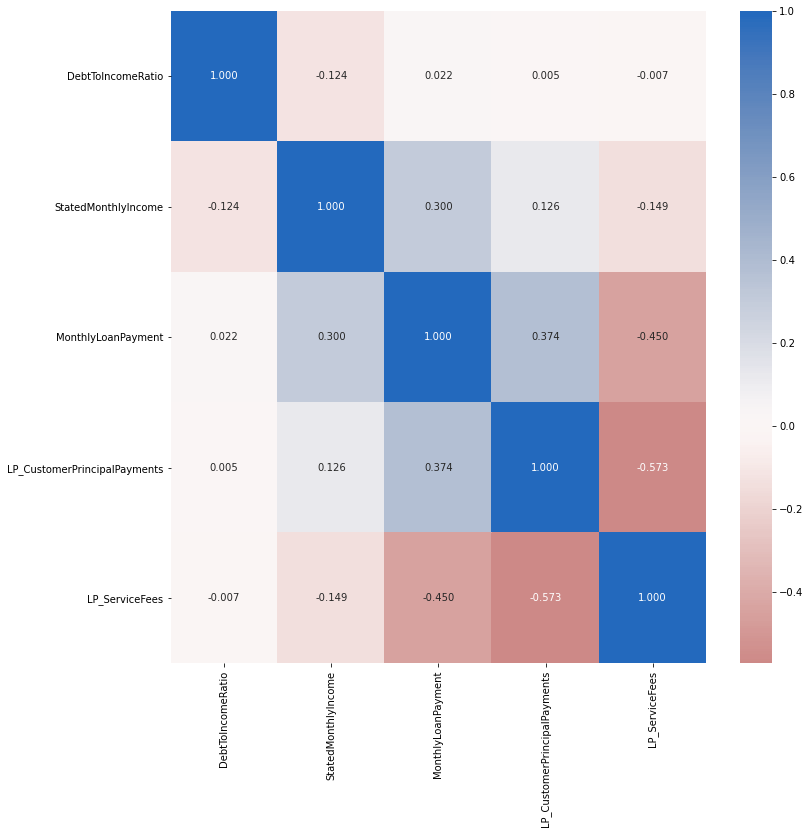

In [12]:
plt.figure(figsize = [12, 12])
plt.title("Integers", size=30)
sb.heatmap(Loan_clean[df].corr(), annot = True, fmt = '.3f', cmap = 'vlag_r', center = 0);

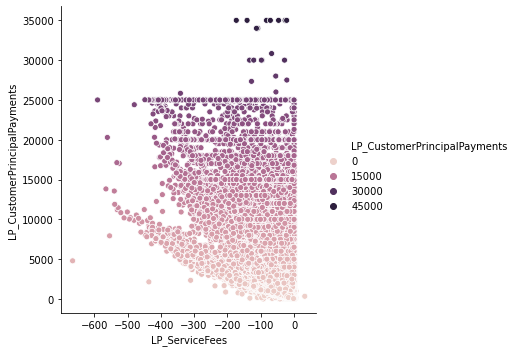

In [42]:
sb.relplot(
    data=Loan_clean,
    x="LP_ServiceFees", y="LP_CustomerPrincipalPayments", hue='LP_CustomerPrincipalPayments')
plt.title("LP_CustomerPrincipalPayments & LP_ServiceFees ", size=15);


## (Visualization 2)

###  How are the ProsperRating (numeric) values arragnged and what effect do they play through out the data?
> The first pies chart is on 'ProsperRating (numeric)', I estmated that it is out of 10, and through the ratings it looks that the customers aren't happy, and to find the issue I think the company needs to conduct a market research.

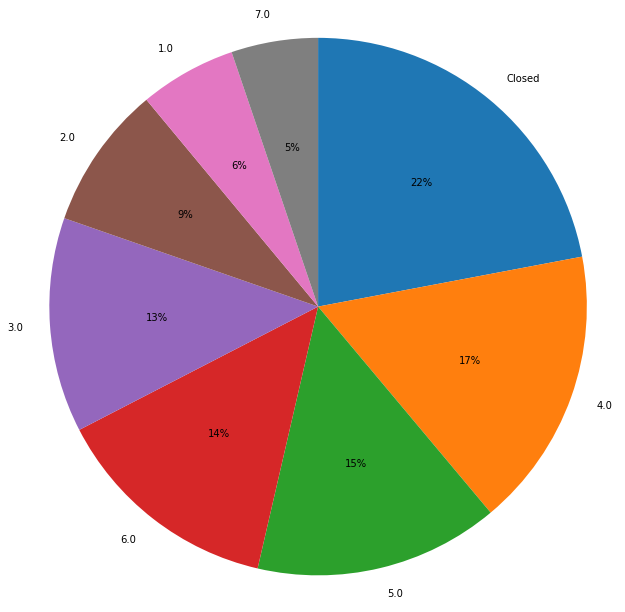

In [14]:
plt.figure(figsize = (11,11))
Bie1 = Loan_clean['ProsperRating (numeric)'].value_counts()
plt.pie(Bie1, labels = Bie1.index, startangle = 90,autopct='%1.0f%%', counterclock = False);
plt.axis('square')
plt.title("ProsperRating (numeric) ", size=15);
Bie1.index;

# (Visualization 3)

###  How are the IncomeRange values arragnged and what effect do they play through out the data?

> The secound pie 'IncomeRange', and it looks that most of the customers has a high income, and it is their target customers they should focus, for the very high income customers have a less percantage, and thats due to many reasons, but I have two assumptions to that, one that when they want something they buy it, second is that is normal to have few very rich people it is impossible to have many very rich people in a country like more than 25% of the country.

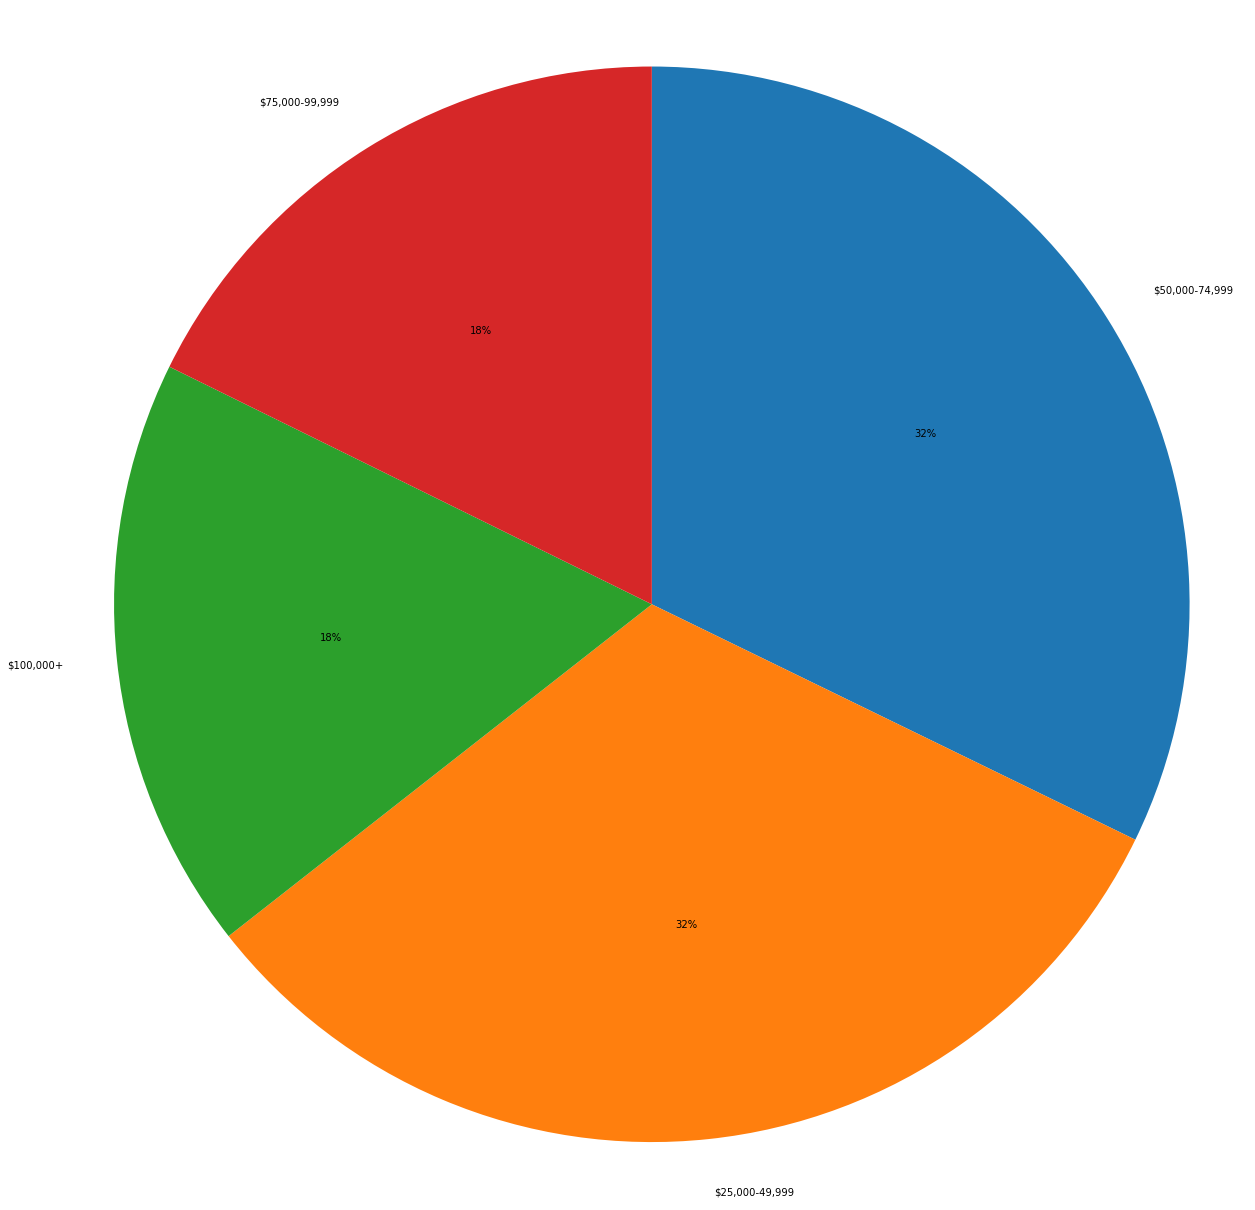

In [15]:
plt.figure(figsize = (22,22))
Bie2 = sub_Loan['IncomeRange'].value_counts()
plt.pie(Bie2, labels = Bie2.index, startangle = 90, autopct='%1.0f%%', counterclock = False)
plt.title("IncomeRange", size=30);
plt.axis('square');


# (Visualization 4)

### How are the Occupation values arragnged and what effect do they play through out the data?
> The third pie chart was on 'Occupation' and to see if the role has impact, and offcourse it has impact but 44% percent of the top employments are unone, and that is due to the very specific roles they have, like doctors, marketing, enegeneering, have many majors and job titles with different names. But we can see that profistonals are more customers than excutives, and I think it could be important to find if there is a big realtion.



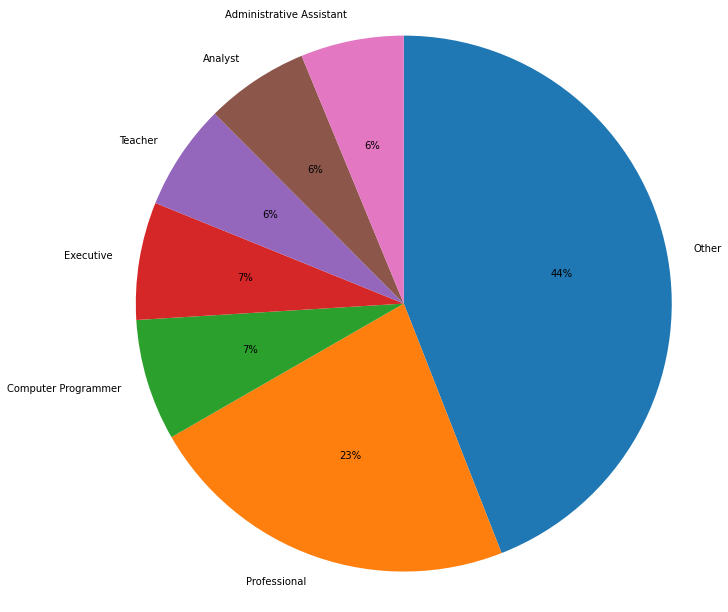

In [16]:
plt.figure(figsize = (11,11))
Bie3 = sub_Loan2['Occupation'].value_counts()
plt.pie(Bie3, labels = Bie3.index, startangle = 90,autopct='%1.0f%%', counterclock = False)
plt.title("Occupation", size=30);
plt.axis('square');

# (Visualization 5)

###  How are the BorrowerState values arragnged and what effect do they play through out the data?
> The fourth pie chart was on 'BorrowerState', and CA has a big percentage over the top states, and that is clear why, because CA has many of rich people, it is expensive, and has many torrists so it proves that this loan is for rich people. But more further thrrough the analysis it provides that this insight is wrong, and there another reason in which we need to conduct a research to find why.

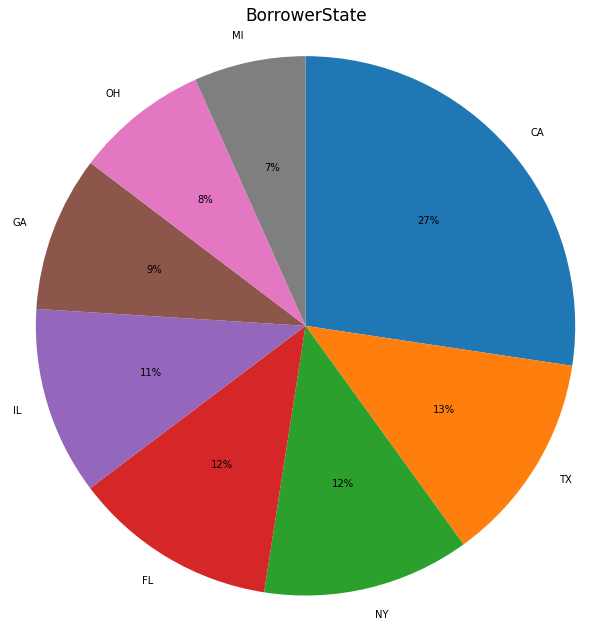

In [69]:
plt.figure(figsize = (11,11))
Bie3 = sub_Loan3['BorrowerState'].value_counts()
plt.pie(Bie3, labels = Bie3.index, startangle = 90,autopct='%1.0f%%', counterclock = False)
plt.title("BorrowerState", size=17);
plt.axis('square');

In [70]:
!jupyter nbconvert Prospers__Slides.ipynb --to slides --post serve --template output_toggle


[NbConvertApp] Converting notebook Prospers__Slides.ipynb to slides
[NbConvertApp] Writing 672993 bytes to Prospers__Slides.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Traceback (most recent call last):
  File "C:\ProgramData\Anaconda3\Scripts\jupyter-nbconvert-script.py", line 10, in <module>
    sys.exit(main())
  File "C:\ProgramData\Anaconda3\lib\site-packages\jupyter_core\application.py", line 270, in launch_instance
    return super(JupyterApp, cls).launch_instance(argv=argv, **kwargs)
  File "C:\ProgramData\Anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 340, in start
    self.convert_notebooks()
  File "C:\ProgramData\Anaconda3\lib\site-packages\nbconvert\nbconvertapp.py", line 510, in convert_notebooks
    self.convert_single_notebook(notebook_filename)
  File "C:\P

# More Useful Insights

> The higher the income the higher the spending, also the income and spending through out the states is random, so there is no clue that states that the richest people or the hiest spending is in CA.
> Adminstrative Assitant has the highest income but don't spend alot. Among the Occupations Exuctives are the most spenders, and among the income the (100,000+) spends the most.
> The state that has very rich people is FL & IL, the highest income is for selfEmployed and the other listed jobs.